In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "FewshotAudioExperimentsResults.xlsx"
df = pd.read_excel(file_path, sheet_name="Angular Loss Experiments", header=0)

# Drop unnecessary columns (like unnamed index columns if needed)
df = df.dropna(how="all", axis=1)

# Rename columns for better readability
df.columns = ["Dataset", "Run", "Projection_Arch", "Theta_0", "Theta_15", "Theta_30", "Theta_45"]

# Identify the row where "Prototypes as Anchor" starts
anchor_idx = df[df["Dataset"].str.contains("Prototypes As anchor", na=False)].index[0]

# Split into No Anchor and With Anchor data
df_no_anchor = df.iloc[:anchor_idx]  # Rows before "Prototypes As Anchor"
df_anchor = df.iloc[anchor_idx + 2 :]  # Rows after "Prototypes As Anchor"

# Forward-fill dataset names
df_no_anchor["Dataset"] = df_no_anchor["Dataset"].ffill()
df_anchor["Dataset"] = df_anchor["Dataset"].ffill()

# Keep only rows where Run == "average"
df_no_anchor = df_no_anchor[df_no_anchor["Run"] == "average"]
df_anchor = df_anchor[df_anchor["Run"] == "average"]

/var/folders/vj/k0xvnc8n7m563v_dzlhdwg9c0000gn/T/ipykernel_31616/1117504165.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anchor["Dataset"] = df_no_anchor["Dataset"].ffill()
/var/folders/vj/k0xvnc8n7m563v_dzlhdwg9c0000gn/T/ipykernel_31616/1117504165.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anchor["Dataset"] = df_anchor["Dataset"].ffill()


In [40]:
df_combined

,Dataset,Theta,Performance,Condition
0,FSD2018,Theta_0,0.579672,No Anchor
1,Nsynth,Theta_0,0.978040,No Anchor
2,ESC-50,Theta_0,0.835364,No Anchor
3,BirdClef,Theta_0,0.750098,No Anchor
4,VoxCeleb,Theta_0,0.793292,No Anchor
5,FSD2018,Theta_15,0.577744,No Anchor
6,Nsynth,Theta_15,0.979444,No Anchor
7,ESC-50,Theta_15,0.822552,No Anchor
8,BirdClef,Theta_15,0.757128,No Anchor
9,VoxCeleb,Theta_15,0.788772,No Anchor


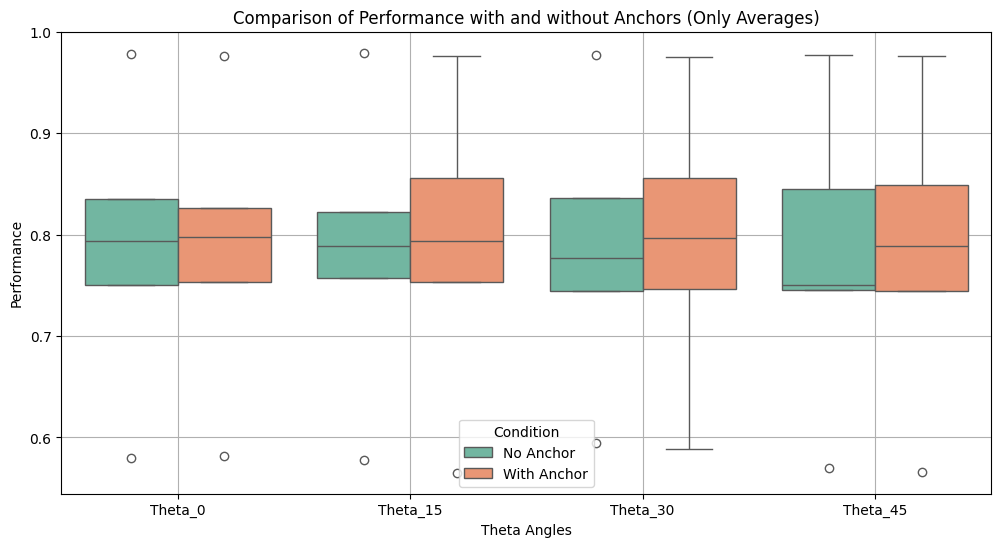

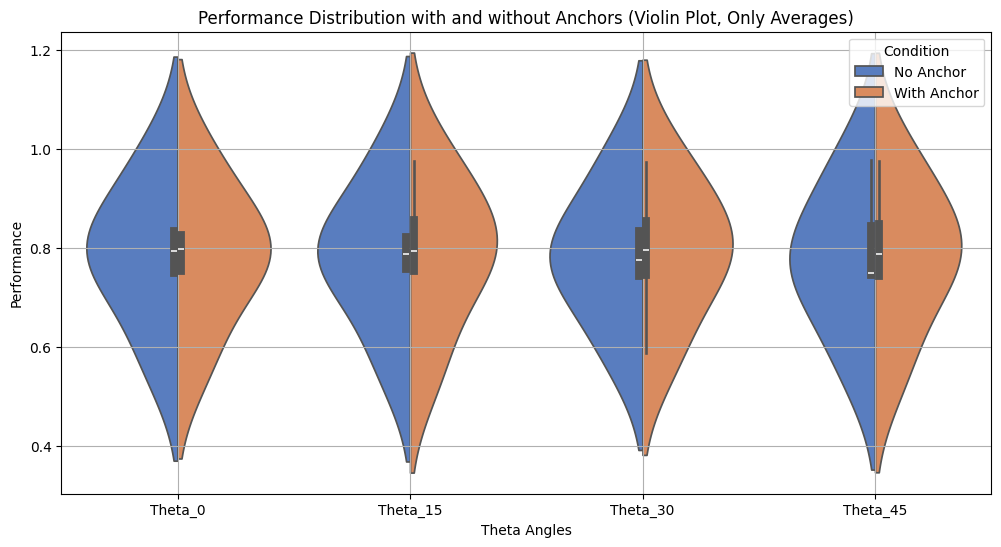

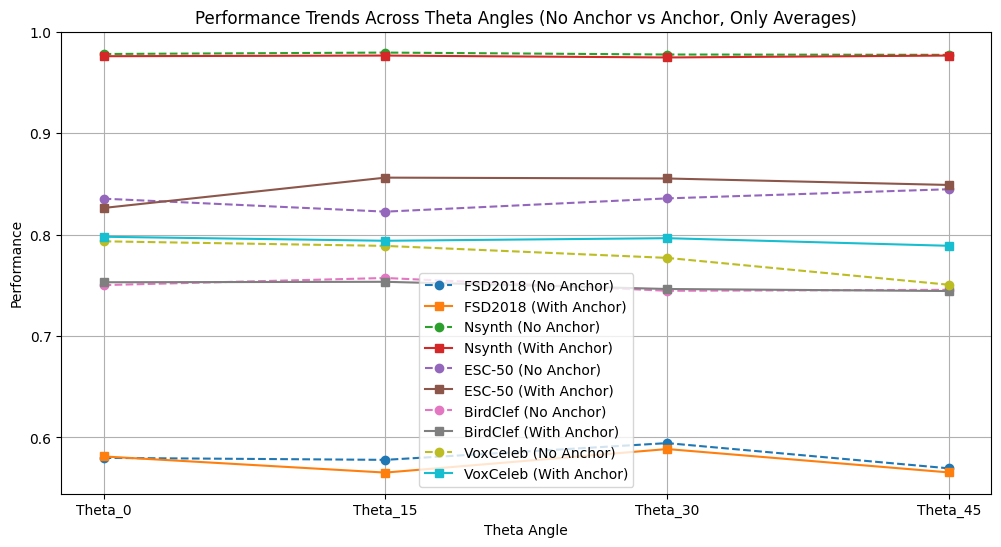

In [39]:
# Convert Theta columns to float
theta_cols = ["Theta_0", "Theta_15", "Theta_30", "Theta_45"]
df_no_anchor[theta_cols] = df_no_anchor[theta_cols].apply(pd.to_numeric, errors="coerce")
df_anchor[theta_cols] = df_anchor[theta_cols].apply(pd.to_numeric, errors="coerce")

# Reshape data for visualization
df_no_anchor_melted = df_no_anchor.melt(id_vars=["Dataset"], value_vars=theta_cols, var_name="Theta", value_name="Performance")
df_anchor_melted = df_anchor.melt(id_vars=["Dataset"], value_vars=theta_cols, var_name="Theta", value_name="Performance")

# Add a Condition column
df_no_anchor_melted["Condition"] = "No Anchor"
df_anchor_melted["Condition"] = "With Anchor"

# Combine both datasets
df_combined = pd.concat([df_no_anchor_melted, df_anchor_melted])

### PLOT 1: Boxplot Comparing No Anchor vs Anchor ###
plt.figure(figsize=(12, 6))
sns.boxplot(x="Theta", y="Performance", hue="Condition", data=df_combined, palette="Set2")
plt.title("Comparison of Performance with and without Anchors (Only Averages)")
plt.xlabel("Theta Angles")
plt.ylabel("Performance")
plt.legend(title="Condition")
plt.grid()
plt.show()

### PLOT 2: Violin Plot for Performance Spread ###
plt.figure(figsize=(12, 6))
sns.violinplot(x="Theta", y="Performance", hue="Condition", data=df_combined, split=True, palette="muted")
plt.title("Performance Distribution with and without Anchors (Violin Plot, Only Averages)")
plt.xlabel("Theta Angles")
plt.ylabel("Performance")
plt.legend(title="Condition")
plt.grid()
plt.show()

### PLOT 3: Performance Trends Across Theta Angles ###
plt.figure(figsize=(12, 6))
for dataset in df_no_anchor["Dataset"].unique():
    subset_no_anchor = df_no_anchor[df_no_anchor["Dataset"] == dataset]
    subset_anchor = df_anchor[df_anchor["Dataset"] == dataset]

    plt.plot(["Theta_0", "Theta_15", "Theta_30", "Theta_45"], subset_no_anchor[theta_cols].values.flatten(),
             marker="o", linestyle="dashed", label=f"{dataset} (No Anchor)")
    plt.plot(["Theta_0", "Theta_15", "Theta_30", "Theta_45"], subset_anchor[theta_cols].values.flatten(),
             marker="s", linestyle="-", label=f"{dataset} (With Anchor)")

plt.xlabel("Theta Angle")
plt.ylabel("Performance")
plt.title("Performance Trends Across Theta Angles (No Anchor vs Anchor, Only Averages)")
plt.legend()
plt.grid()
plt.show()

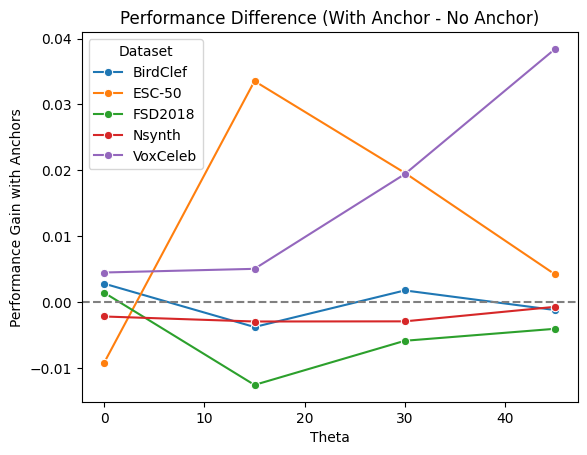

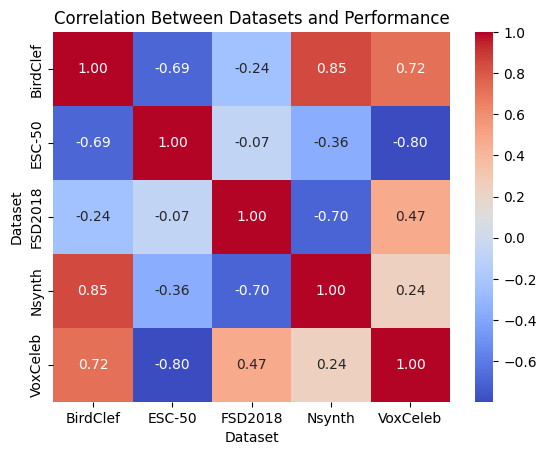

In [49]:
# Pivot Table to Calculate Performance Difference
df_pivot = df_combined.pivot_table(index=['Dataset', 'Theta'], columns='Condition', values='Performance').reset_index()
df_pivot['Performance_Diff'] = df_pivot['With Anchor'] - df_pivot['No Anchor']

# 1️⃣ Line Plot: Performance Difference (With Anchor - No Anchor)
sns.lineplot(data=df_pivot, x='Theta', y='Performance_Diff', hue='Dataset', marker='o')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Performance Difference (With Anchor - No Anchor)")
plt.ylabel("Performance Gain with Anchors")
plt.show()

# 2️⃣ Correlation Heatmap: Theta vs Performance
correlation_matrix = df_combined.pivot_table(index='Theta', columns='Dataset', values='Performance', aggfunc='mean').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Datasets and Performance")
plt.show()


In [50]:
# Mapping dataset names to their total number of samples and classes
dataset_info = {
    "Nsynth": {"Num_Samples": 217681 + 29833 + 58465, "Num_Classes": 705 + 101 + 200},
    "ESC-50": {"Num_Samples": 1400 + 200 + 400, "Num_Classes": 50},
    "BirdClef": {"Num_Samples": 45973 + 6425 + 13021, "Num_Classes": 501 + 72 + 142},
    "FSD2018": {"Num_Samples": 8123 + 1261 + 1689, "Num_Classes": 29 + 5 + 7},
    "VoxCeleb": {"Num_Samples": 39533 + 5943 + 11123, "Num_Classes": 655 + 96 + 177},
}

# Add new columns
df_combined['Num_Samples'] = df_combined['Dataset'].map(lambda x: dataset_info[x]["Num_Samples"])
df_combined['Num_Classes'] = df_combined['Dataset'].map(lambda x: dataset_info[x]["Num_Classes"])


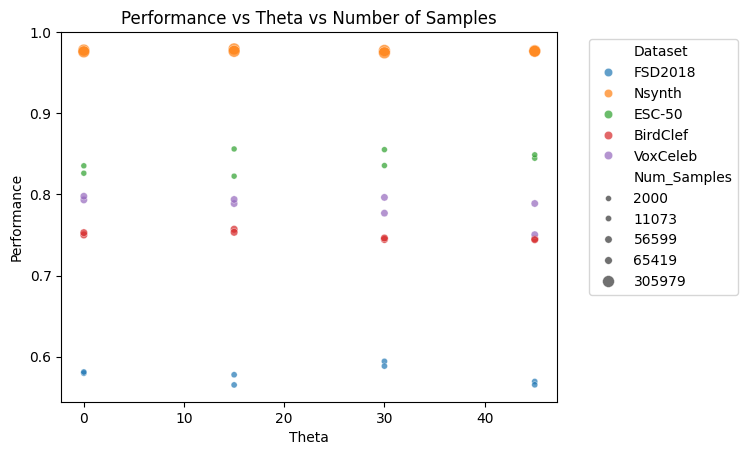

In [52]:
sns.scatterplot(data=df_combined, x='Theta', y='Performance', size='Num_Samples', hue='Dataset', alpha=0.7)
plt.title("Performance vs Theta vs Number of Samples")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


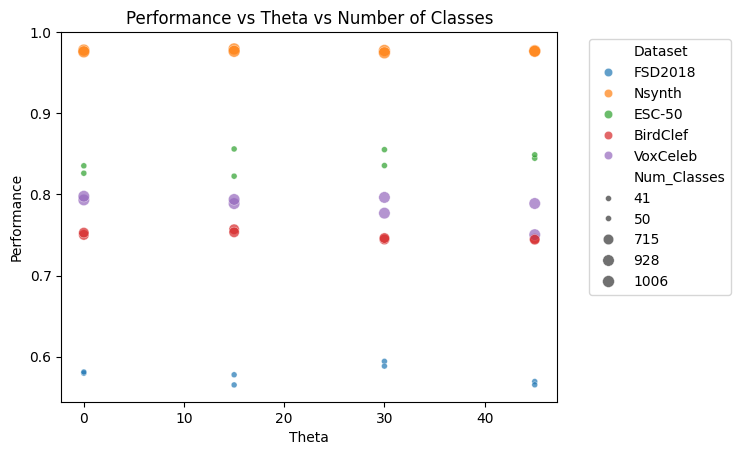

In [53]:
sns.scatterplot(data=df_combined, x='Theta', y='Performance', size='Num_Classes', hue='Dataset', alpha=0.7)
plt.title("Performance vs Theta vs Number of Classes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


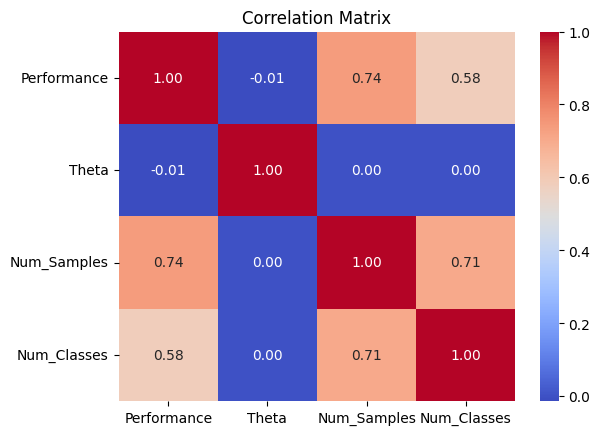

In [54]:
corr_matrix = df_combined[['Performance', 'Theta', 'Num_Samples', 'Num_Classes']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
